<a href="https://colab.research.google.com/github/jumafernandez/clasificacion_correos/blob/main/notebooks/XX_Probando_features_est%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimentos TFI-UNLP

En esta notebook vamos a trabajar con experimentos para el TFI de la Especialización en Inteligencia de Datos con Orientación en Big Data de la Universidad Nacional de La Plata.

Para ello vamos a preprocesar los correos y aplicar tres modelos:
- Bayes,
- Máquina Vector-Soporte,
- Regresión Logística,
- Árboles de clasificación (bonus track).

Incorporamos el archivo al Collab:

In [22]:
# Descargo el archivo con las consultas que está en Github
from os import path

# En caso que no esté el archivo en Colab lo traigo
if not(path.exists('03-Correos_variables_estaticas.csv')):
  !wget https://raw.githubusercontent.com/jumafernandez/clasificacion_correos/main/data/03-Correos_variables_estaticas.csv

In [23]:
# Leo el archivo en un dataframe
import pandas as pd

df = pd.read_csv('03-Correos_variables_estaticas.csv', delimiter="|")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Consulta                       1000 non-null   object 
 1   dia_semana                     1000 non-null   int64  
 2   semana_del_mes                 1000 non-null   int64  
 3   mes                            1000 non-null   int64  
 4   cuatrimestre                   1000 non-null   int64  
 5   anio                           1000 non-null   int64  
 6   hora_discretizada              1000 non-null   int64  
 7   dni_discretizado               1000 non-null   int64  
 8   legajo_discretizado            1000 non-null   int64  
 9   posee_legajo                   1000 non-null   int64  
 10  posee_telefono                 1000 non-null   int64  
 11  carrera_valor                  1000 non-null   int64  
 12  proveedor_correo               1000 non-null   ob

In [24]:
# Vemos la cantidad de Instancias por clase
df.Clase.value_counts()

Boleto Universitario                   240
Ingreso a la Universidad               232
Requisitos de Ingreso                  129
Pedido de Certificados                  69
Inscripción a Cursadas                  64
Problemas con la Clave                  51
Reincorporación                         47
Cursadas                                23
Exámenes                                19
Carga de Notas                          17
Consulta por Legajo                     16
Consulta por Equivalencias              14
Cambio de Carrera                       14
Situación Académica                     12
Cambio de Comisión                      11
Vacunas Enfermería                      10
Consulta sobre Título Universitario     10
Datos Personales                        10
Certificados Web                         6
Simultaneidad de Carreras                6
Name: Clase, dtype: int64

In [25]:
# Transformamos todas las Clases minoritarias (Puedo ir variando la cantidad de clases que derivo a la Clase "Otras Consultas")
cantidad_clases=3

clases = df.Clase.value_counts()
clases_minoritarias = clases.iloc[cantidad_clases:].keys().to_list()

df.Clase[df['Clase'].isin(clases_minoritarias)] = "Otras Consultas"

df.Clase.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Otras Consultas             399
Boleto Universitario        240
Ingreso a la Universidad    232
Requisitos de Ingreso       129
Name: Clase, dtype: int64

In [26]:
df.drop(columns=['Consulta'], inplace=True)

In [27]:
# Separo en features y clase los atributos del DataFrame

# Numerizo los proveedores de correo
le_correo = preprocessing.LabelEncoder()
df['proveedor_correo'] = le_correo.fit_transform(df['proveedor_correo'])

# Features
feature_names = list(df.columns)
# Elimino type porque es la clase
feature_names.remove('Clase')
x = df[feature_names]

# Class
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(df['Clase'])
target_names=le.classes_

In [28]:
# Separo datos de entrenamiento y testing

from sklearn.model_selection import train_test_split

# Separo en 70-30 entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)


## Naive Bayes

Aquí probamos con Naive Bayes (Usamos ComplementNB que posee optimizaciones para datasets desbalanceados):

In [29]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

modelo_bayes = ComplementNB()

modelo_bayes.fit(x_train, y_train)

# Realizo la predicción de y con el x_test
y_pred = modelo_bayes.predict(x_test)

In [30]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


## Máquina Vector-Soporte (SVM):

Ahora corremos el segundo modelo:

In [43]:
from sklearn.svm import LinearSVC

modelo_svc = LinearSVC(max_iter=1000000)
modelo_svc.fit(x_train, y_train)

# Realizo la predicción de y con el x_test
y_pred = modelo_svc.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5066666666666667


## Regresión Logística

Aquí corremos el tercer modelo:

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

modelo_regresion = LogisticRegression(max_iter=10000)
modelo_regresion.fit(x_train, y_train)

# Realizo la predicción de y con el x_test
y_pred = modelo_regresion.predict(x_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.56


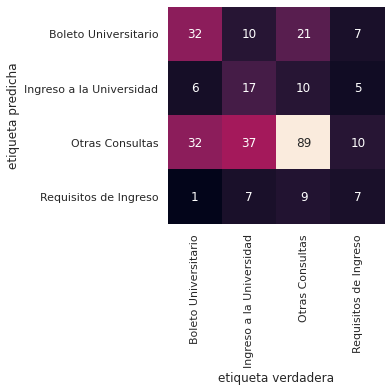

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('etiqueta verdadera')
plt.ylabel('etiqueta predicha');

## Árboles de clasificación (Bonus track)

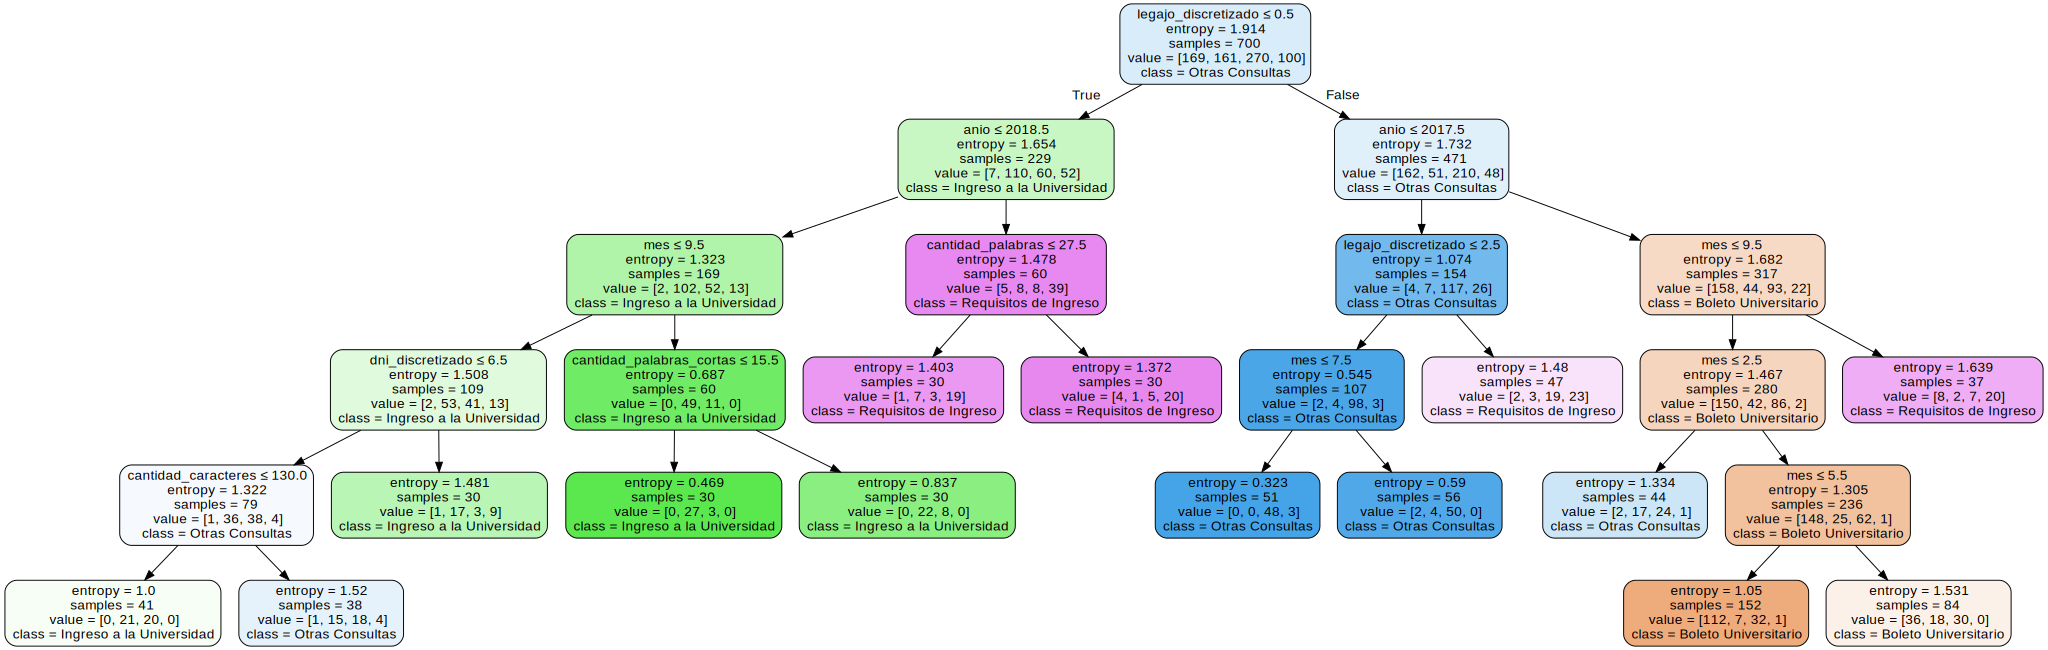

<Figure size 1152x576 with 0 Axes>

In [36]:
from sklearn import tree

arbol = tree.DecisionTreeClassifier(criterion='entropy',  max_depth=5, min_samples_leaf=30)

arbol = arbol.fit(x_train, y_train)

#Importamos la librería
import graphviz

plt.figure(figsize=(16,8))

dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                label='all',
                                filled=True, rounded=True,
                                special_characters=True)

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph

In [37]:
#Predict the response for test dataset
y_pred = arbol.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6533333333333333
